## Part 1 - Building the CNN

In [1]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.3))


# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Part 2 Image Augmentation and Data Preprocessing

### Training Set : 281 Images
### Validation Set : 49 Images

In [2]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/Train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/Test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 281 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


## Part 3 - Fitting the CNN to the images

In [3]:
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 281,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 49)


Epoch 1/25
281/281 [==============================] - 52s 186ms/step - loss: 0.5417 - acc: 0.7138 - val_loss: 0.6544 - val_acc: 0.6747
Epoch 2/25
281/281 [==============================] - 51s 182ms/step - loss: 0.3042 - acc: 0.8674 - val_loss: 1.0182 - val_acc: 0.6738
Epoch 3/25
281/281 [==============================] - 51s 182ms/step - loss: 0.1469 - acc: 0.9440 - val_loss: 1.1104 - val_acc: 0.7136
Epoch 4/25
281/281 [==============================] - 51s 183ms/step - loss: 0.0786 - acc: 0.9725 - val_loss: 1.1758 - val_acc: 0.7740
Epoch 5/25
281/281 [==============================] - 50s 179ms/step - loss: 0.0390 - acc: 0.9874 - val_loss: 1.1829 - val_acc: 0.7558
Epoch 6/25
281/281 [==============================] - 49s 176ms/step - loss: 0.0336 - acc: 0.9887 - val_loss: 1.3102 - val_acc: 0.7136
Epoch 7/25
281/281 [==============================] - 50s 176ms/step - loss: 0.0222 - acc: 0.9929 - val_loss: 1.2847 - val_acc: 0.7748
Epoch 8/25
281/281 [==============================] - 5

### Got a Training Accuracy : 99.74 %
### Got a Validation Accuracy : 75.41 %
<br><br><br><br>

## Saving Model and Weights !



In [20]:
# Saving Model and Weights
model_json = classifier.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
classifier.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Load json and Create Model



In [56]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
h = loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


## Part 3 - Making new predictions

In [5]:
y_actual = [0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1]
y_pred = []

In [6]:
import numpy as np
from keras.preprocessing import image

for no in range(1,19):
    s = 'dataset/Pred/'+str(no)+'.jpg'
    test_image = image.load_img(s, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    y_pred.append(result[0][0])

In [7]:
training_set.class_indices

{'Benign': 0, 'Malignant': 1}

In [8]:
y_actual

[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [12]:
y_pred

[1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.8242457e-21,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [13]:
y_pred[6] = 0

## Part 4 - Calculating the Accuracy

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_actual, y_pred)

0.6666666666666666

## Got a Testing Accuracy of 66.666% on 18 Test Images

## Part 5 - Visulizations of Training and Validation Accuracy.

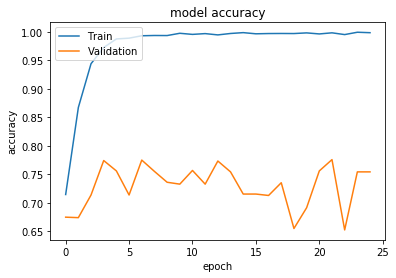

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc']
        )
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [19]:
history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])